# EAA CA2
## Analysing a resource usage/load

### GitHub
Find me on github at: https://github.com/dmateusp/EAA/blob/master/CA2/EAA%20CA2.ipynb

### The system configuration:
* Motherboard: 2560 MB memory
* Processor: 1 CPU, execution cap: 100%
* Operating system: Linux Fedora 64bits (virtual machine)
* Memory: 1 disk, virtual size 19.25GB (actual size 11.74GB)

### The test:
The resource tested here is the processor, only 1 CPU is used for simplicity.

### Report
This report is 411 words long

#### Importing libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
plt.style.use('ggplot')

#### Reading the data and converting to numbers

In [16]:
def numerical_converter(n):
    try:
        return int(n)
    except ValueError:
        return float(n)

with open('results.dat','r') as f:
    next(f)
    df = pd.DataFrame(map(numerical_converter, l.rstrip().split()) for l in f) # reading file

    df.columns = ['C0', 'N', 'idle'] # setting the header

In [17]:
df.head() # displaying five first rows

,C0,N,idle
0,50,1,78.62
1,88,2,78.91
2,123,3,73.72
3,152,4,68.69
4,180,5,63.40


## Ui vs N
Ui is the utilisation of resource, `Ui`

N is the number of concurrent users

Ui for a CPU is the amount of time not spent in idle task

The resource here is the CPU, each loadtest runs during 11 seconds and a summary is generated every second during 10 seconds, the data used is the average of those summaries, the busy time will be calculated with the formula `100 - idle`.

`Ui = (100 - idle)`

In [18]:
df['Ui'] = (100 - df['idle']) # calculating Ui

In [19]:
df.head() # displaying five first rows

,C0,N,idle,Ui
0,50,1,78.62,21.38
1,88,2,78.91,21.09
2,123,3,73.72,26.28
3,152,4,68.69,31.31
4,180,5,63.40,36.60


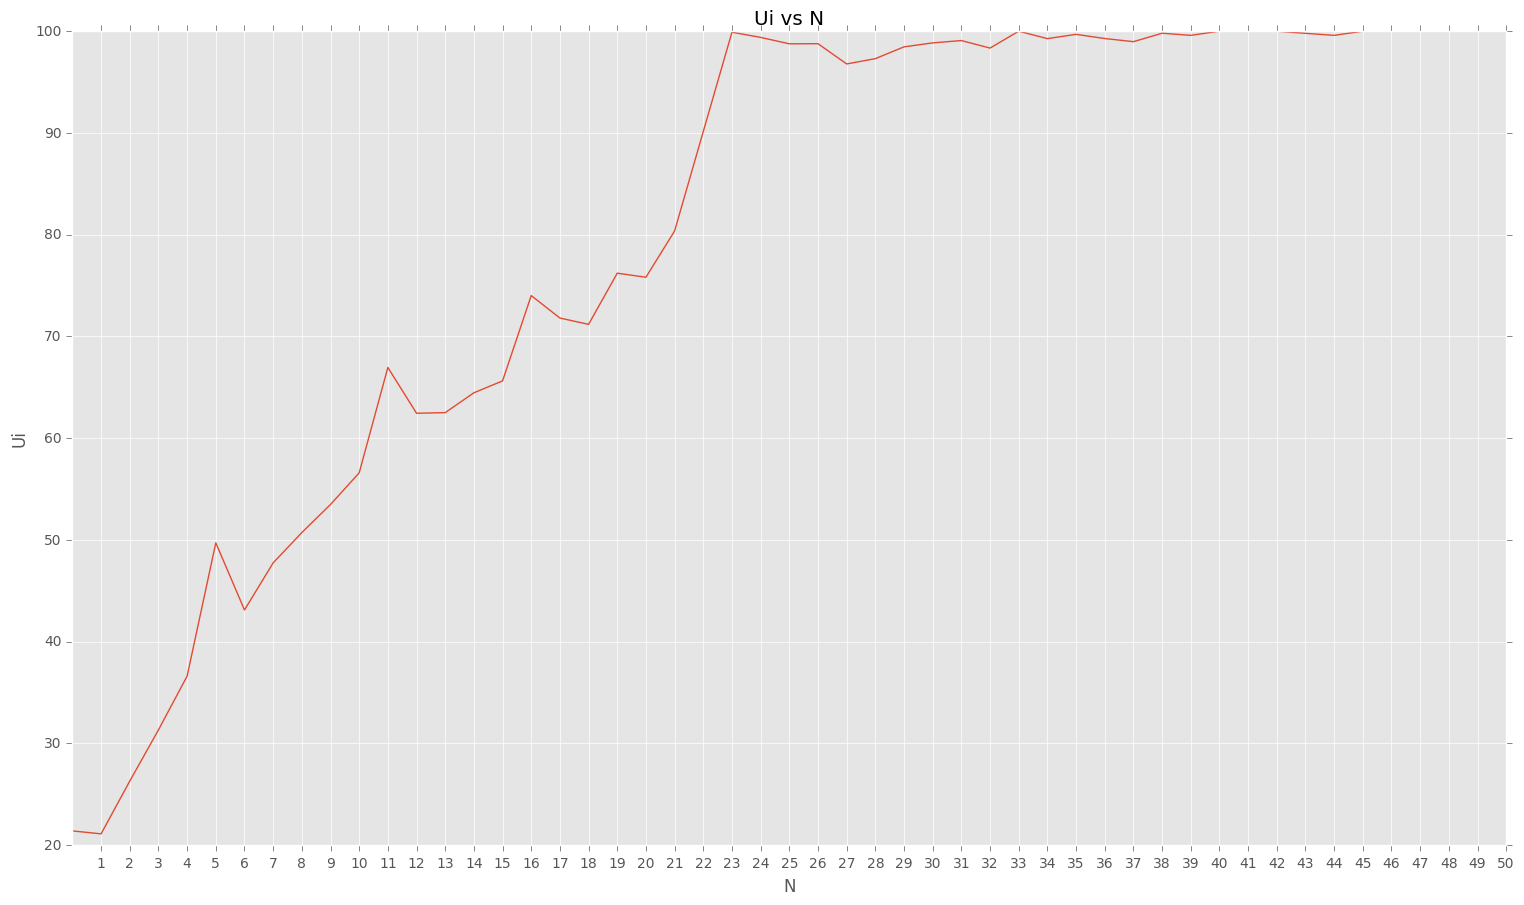

In [20]:
plt.plot(df['Ui'])
plt.xticks(df['N'])
plt.title("Ui vs N")
plt.xlabel("N")
plt.ylabel("Ui")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

### Analysis
N represents the number of concurrent users, as we increase the number of users the resources are used more (here the CPU).

The CPU is getting saturated around 23 concurrent users where it reaches 95%, if this was a real system we could study other resources usage, if they saturated with less users we would have to upgrade these resources before (to enable the system to handle more concurrent users).

Otherwise the CPU would be the priority. A system can only go as fast as its slowest component, so the different resources of the system would have to be monitored to improve it effectively. 

## Di vs N
Di is the service demand, `Di = Vi * Si = Ui / X0`

N is the number of concurrent users

X0 is the throughput `X0 = C0/T = C0 / 10`

T is the length of time in the observation period (10 seconds)


`Di = Ui / (C0 / 10)`

In [29]:
df['Di'] = df['Ui']/(df['C0']/10)

In [30]:
df.head()

,C0,N,idle,Ui,Di,X0
0,50,1,78.62,21.38,4.276000,12.50
1,88,2,78.91,21.09,2.396591,22.00
2,123,3,73.72,26.28,2.136585,30.75
3,152,4,68.69,31.31,2.059868,38.00
4,180,5,63.40,36.60,2.033333,45.00


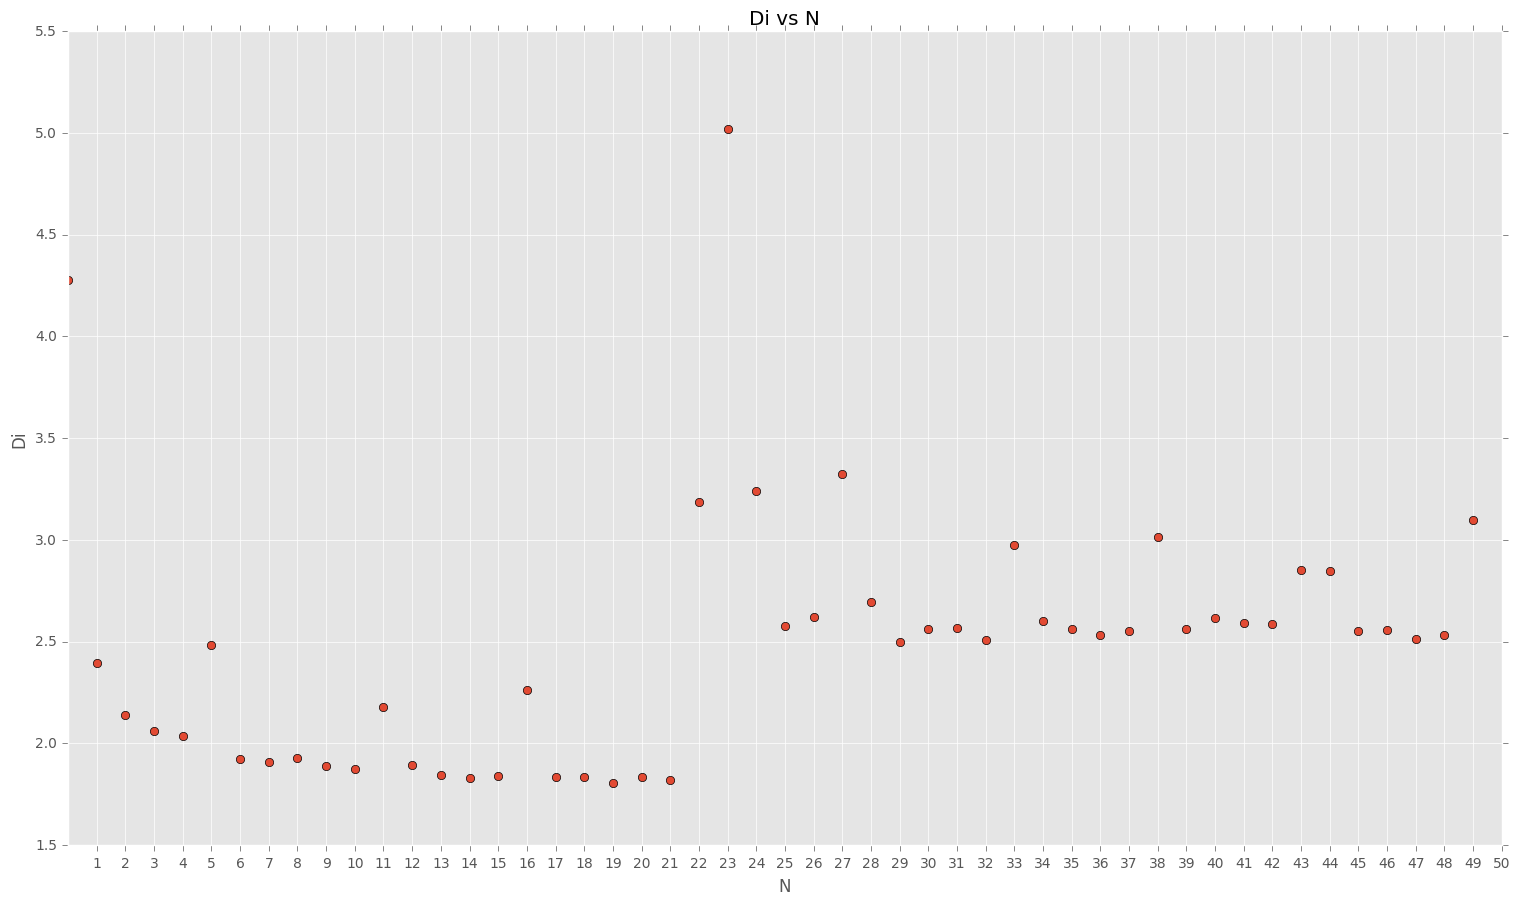

In [39]:
plt.plot(df['Di'],'o')
plt.xticks(df['N'])
plt.title("Di vs N")
plt.xlabel("N")
plt.ylabel("Di")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

### Analysis
The service demand is supposed to be constant overall, as it represents the time it takes for the CPU to complete one transaction.
The average seems to be 2.5 (see summary at bottom of document).

## X0 vs N
X0 is the system throughput, `X0 = C0 / T`

T is the length of time in the observation period

In [33]:
df['X0'] = df['C0'] / 10

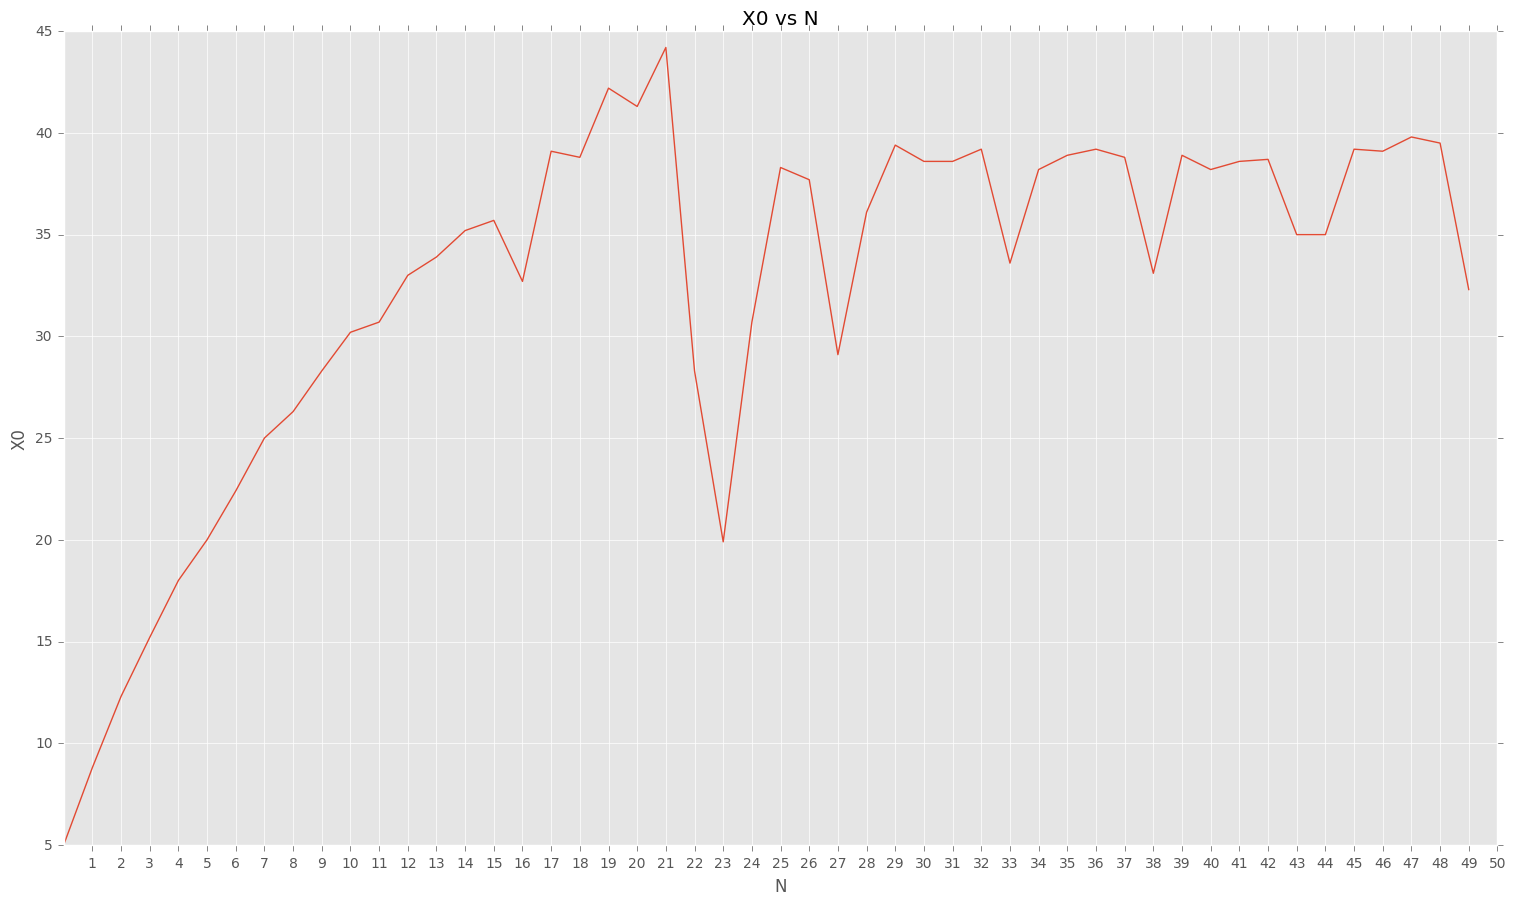

In [34]:
plt.plot(df['X0'])
plt.xticks(df['N'])
plt.title("X0 vs N")
plt.xlabel("N")
plt.ylabel("X0")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

### Analysis
The system seems to have a maximum throughput of 40-45 which means that no matter how many users are using the system, it saturates around 40-45 transactions a second.

## R vs N
R is the interactive response time, `R = X0 / N`

In [42]:
df['R'] = df['N']/df['X0']

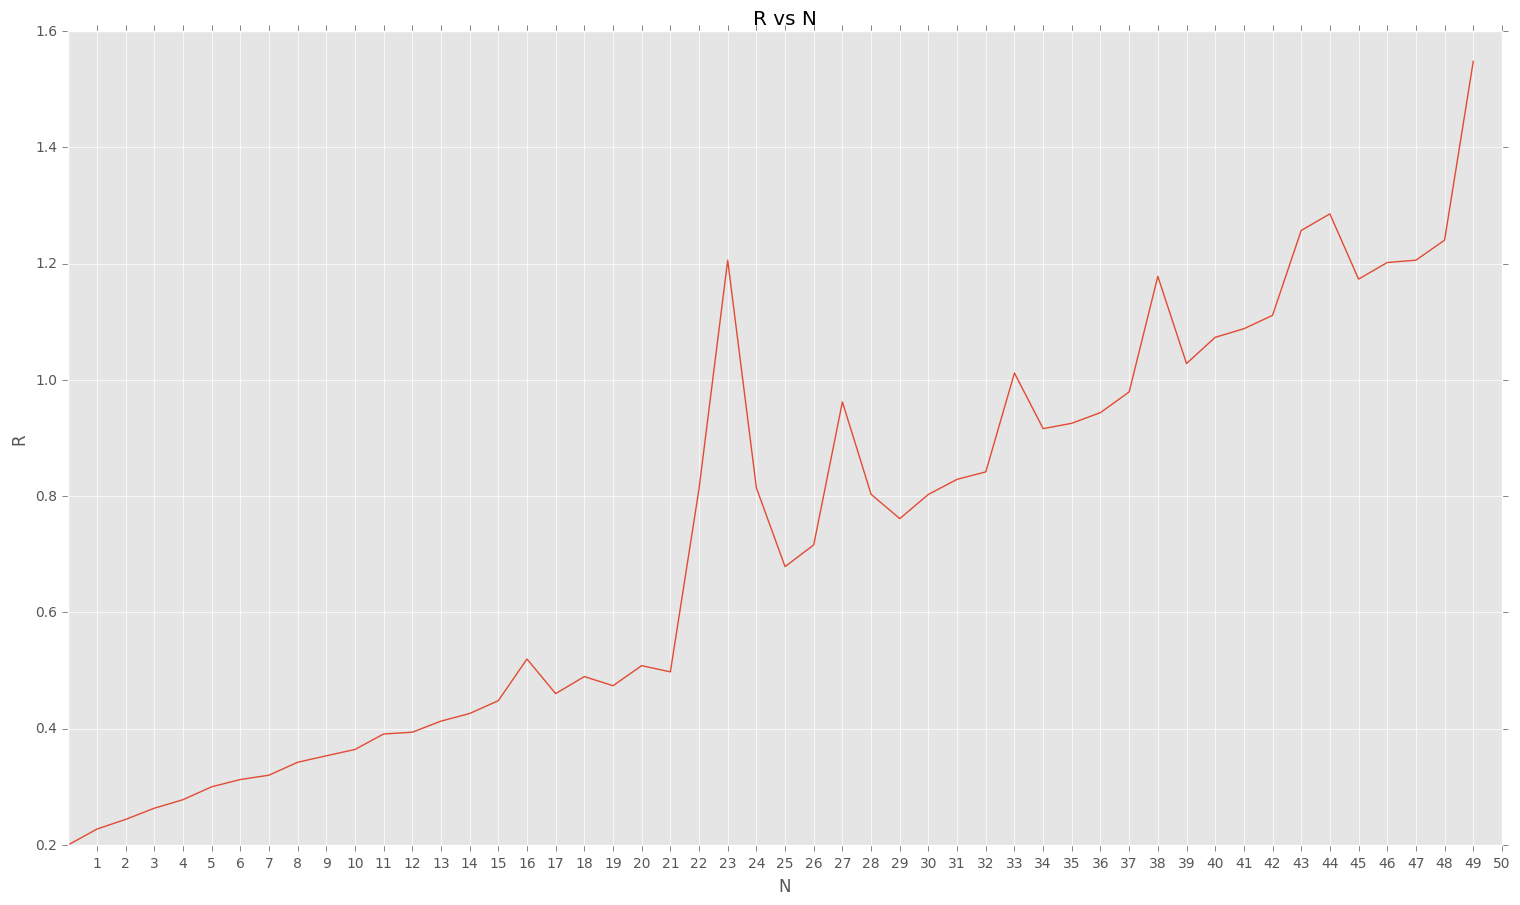

In [43]:
plt.plot(df['R'])
plt.xticks(df['N'])
plt.title("R vs N")
plt.xlabel("N")
plt.ylabel("R")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

### Analysis
The response time is the time it takes for a request to be answered by the system. This shows that as the number of users increase this response time increases, to almost 1.6 seconds. 

If the response time was an important criteria in this system we would have to decide what is an acceptable response time and improve our system to achieve this goal.

In the example of websites, if the loading time is too long users will quit the website.

## Summary

In [35]:
summary = df.drop('N', 1).describe()[1:] # Strip off count as it will always be 50, Excluding N
summary

,C0,idle,Ui,Di,X0
mean,326.060000,20.37960,79.62040,2.484450,32.606000
std,90.003041,25.19955,25.19955,0.620161,9.000304
min,50.000000,0.00000,21.09000,1.805924,5.000000
25%,293.750000,0.33500,62.98750,1.925115,29.375000
50%,354.500000,2.18000,97.82000,2.532149,35.450000
75%,388.750000,37.01250,99.66500,2.613024,38.875000
max,442.000000,78.91000,100.00000,5.020101,44.200000


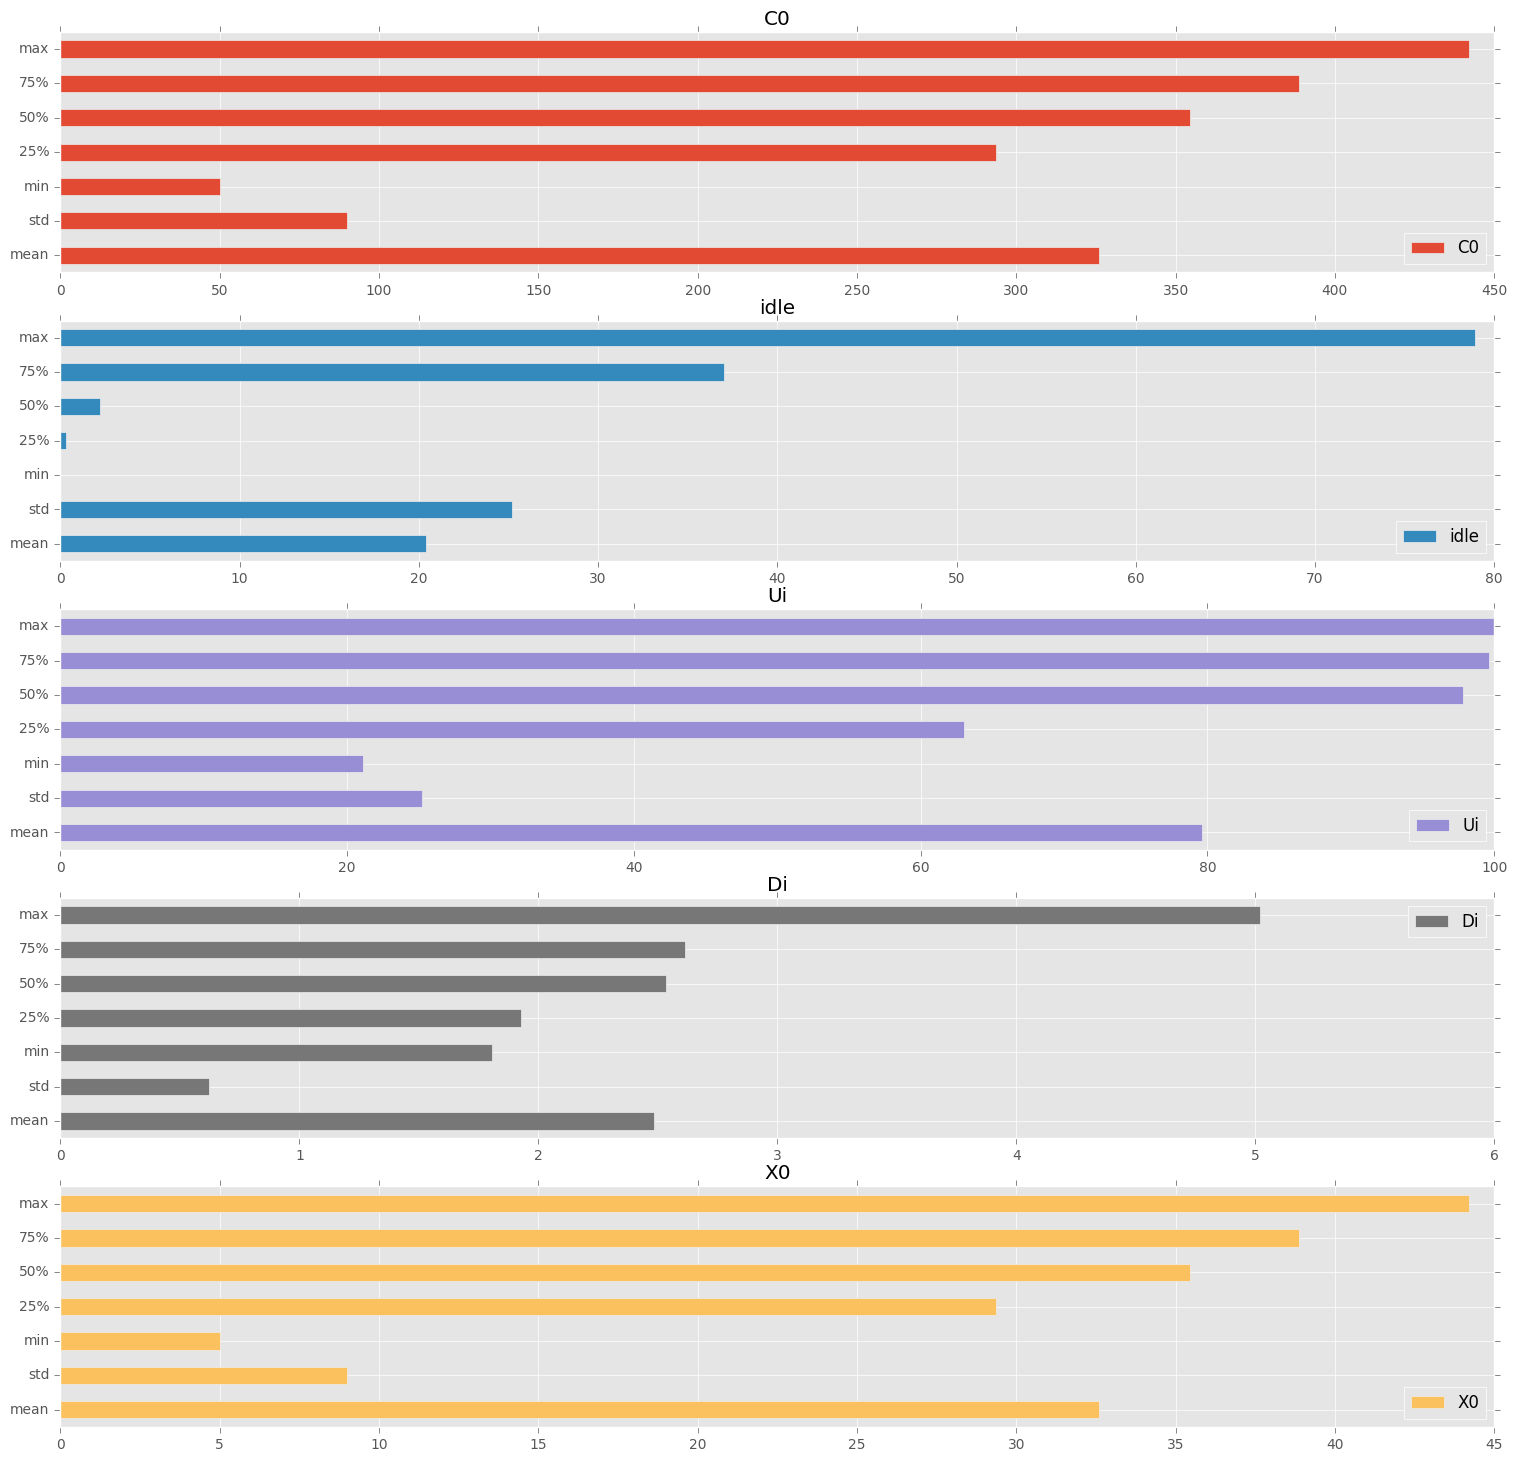

In [36]:
summary.plot(kind='barh', subplots=True, sharex=False)

fig = plt.gcf()
fig.set_size_inches(18.5, 18)

plt.show()